In [ ]:
import networkx as nx
from networkx.algorithms import community

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.karate_club_graph()

In [3]:
for obj in community.k_clique_communities(G, 3):
    print(obj)

frozenset({0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33})
frozenset({0, 16, 4, 5, 6, 10})
frozenset({24, 25, 31})


In [4]:
for obj in community.label_propagation_communities(G):
    print(obj)

{32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}
{16, 5, 6}
{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}


In [5]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [6]:
import json

star_wars = json.load(open('./starwars-full-mentions.json'))

In [8]:
star_wars_graph = nx.Graph()

for index, character_dict in enumerate(star_wars['nodes']):
    star_wars_graph.add_node(index, name= character_dict['name'], scenes=character_dict['value'])
    
star_wars_graph.add_weighted_edges_from([(e['source'], e['target'], e['value']) for e in star_wars['links']])

In [9]:
star_wars_graph.nodes[1]

{'name': 'QUI-GON', 'scenes': 87}

In [10]:
def community_printer(community_iterator, G=star_wars_graph):
    total_size = 0
    for index, this_community in enumerate(community_iterator):
        print('Community {}, size {}'.format(index, len(this_community)))
        print('-'*20)
        for character in this_community:
            print(G.nodes[character]['name'])
        print('\n')
        total_size += len(this_community)
    print('Number of characters = ', total_size)

In [11]:
community_printer(community.label_propagation_communities(star_wars_graph))

Community 0, size 3
--------------------
NIV LEK
YOLO ZIFF
ELLO ASTY


Community 1, size 48
--------------------
C-3PO
SNAP
RED LEADER
MON MOTHMA
DARTH VADER
CHEWBACCA
CAPTAIN ANTILLES
LUKE
LEIA
TARKIN
YOUNG GIRL
BIGGS
CAMIE
MOTTI
HAN
WEDGE
GOLD LEADER
DODONNA
RED TEN
GOLD FIVE
RIEEKAN
DERLIN
ZEV
PIETT
OZZEL
DACK
JANSON
NEEDA
LANDO
BIB FORTUNA
BOUSHH
ADMIRAL ACKBAR
BB-8
POE
LOR SAN TEKKA
KYLO REN
CAPTAIN PHASMA
FINN
REY
UNKAR PLUTT
GENERAL HUX
LIEUTENANT MITAKA
SNOKE
BALA-TIK
MAZ
JESS
ADMIRAL STATURA
COLONEL DATOO


Community 2, size 59
--------------------
NUTE GUNRAY
QUI-GON
TC-14
PK-4
OBI-WAN
YODA
DOFINE
RUNE
TEY HOW
VALORUM
RABE
EMPEROR
CAPTAIN PANAKA
SIO BIBBLE
JAR JAR
TARPALS
BOSS NASS
PADME
RIC OLIE
R2-D2
ANAKIN
WATTO
SEBULBA
JIRA
SHMI
DARTH MAUL
KITSTER
WALD
GREEDO
FODE/BEED
JABBA
MACE WINDU
KI-ADI-MUNDI
BAIL ORGANA
GENERAL CEEL
BRAVO TWO
BRAVO THREE
COUNT DOOKU
CAPTAIN TYPHO
SENATOR ASK AAK
ORN FREE TAA
TAUN WE
LAMA SU
JANGO FETT
BOBA FETT
BERU
OWEN
CLIEGG
POGGLE
SUN RIT
PLO K

In [12]:
community_printer(community.k_clique_communities(star_wars_graph, 5))

Community 0, size 89
--------------------
NUTE GUNRAY
QUI-GON
TC-14
OBI-WAN
YODA
RUNE
VALORUM
RABE
EMPEROR
CAPTAIN PANAKA
SIO BIBBLE
JAR JAR
BOSS NASS
PADME
RIC OLIE
R2-D2
ANAKIN
WATTO
SEBULBA
JIRA
C-3PO
SHMI
DARTH MAUL
KITSTER
WALD
GREEDO
FODE/BEED
JABBA
MACE WINDU
KI-ADI-MUNDI
BAIL ORGANA
GENERAL CEEL
COUNT DOOKU
CAPTAIN TYPHO
SENATOR ASK AAK
ORN FREE TAA
JANGO FETT
BOBA FETT
SNAP
BERU
OWEN
CLIEGG
POGGLE
SUN RIT
PLO KOON
GENERAL GRIEVOUS
RED LEADER
ODD BALL
MON MOTHMA
FANG ZAR
GIDDEAN DANU
CLONE COMMANDER CODY
DARTH VADER
CHEWBACCA
CAPTAIN ANTILLES
LUKE
LEIA
TARKIN
YOUNG GIRL
BIGGS
MOTTI
HAN
WEDGE
GOLD LEADER
DODONNA
RED TEN
GOLD FIVE
RIEEKAN
DERLIN
PIETT
LANDO
JERJERROD
BIB FORTUNA
BOUSHH
ADMIRAL ACKBAR
BB-8
POE
LOR SAN TEKKA
KYLO REN
CAPTAIN PHASMA
FINN
REY
UNKAR PLUTT
GENERAL HUX
SNOKE
BALA-TIK
MAZ
JESS
ADMIRAL STATURA


Community 1, size 5
--------------------
RIC OLIE
R2-D2
BRAVO TWO
BRAVO THREE
ANAKIN


Community 2, size 5
--------------------
PADME
ANAKIN
RUWEE
JOBAL
SOLA


Co

## Girvan Newman algorithm (part of NetworkX)

In [39]:
import itertools
GNC = community.girvan_newman(star_wars_graph)
GNC_top = itertools.islice(GNC, 25)

In [40]:
SWC = list(GNC)

In [41]:
def print_level_gn(partition, cutoff = 0):
    for community_number, members in enumerate(partition):
        if len(members) >= cutoff:
            print(f"Community {community_number} (size = {len(members)})")
            print('-'*20)
            string_of_members = ', '.join([star_wars_graph.node[member]['name'] for member in members])
            print(string_of_members)
            print()

In [52]:
print_level_gn(SWC[50], 3)

Community 0 (size = 34)
--------------------
NUTE GUNRAY, QUI-GON, OBI-WAN, YODA, RUNE, VALORUM, RABE, EMPEROR, CAPTAIN PANAKA, SIO BIBBLE, JAR JAR, BOSS NASS, PADME, RIC OLIE, R2-D2, ANAKIN, WATTO, SEBULBA, C-3PO, SHMI, DARTH MAUL, KITSTER, FODE/BEED, JABBA, MACE WINDU, KI-ADI-MUNDI, BAIL ORGANA, GENERAL CEEL, COUNT DOOKU, CAPTAIN TYPHO, JANGO FETT, BOBA FETT, GENERAL GRIEVOUS, DARTH VADER

Community 11 (size = 3)
--------------------
RUWEE, JOBAL, SOLA

Community 20 (size = 5)
--------------------
BIGGS, WEDGE, GOLD LEADER, DODONNA, RED LEADER

Community 22 (size = 18)
--------------------
LOR SAN TEKKA, KYLO REN, CHEWBACCA, CAPTAIN PHASMA, LUKE, LEIA, FINN, UNKAR PLUTT, REY, SNOKE, BALA-TIK, HAN, MAZ, BIB FORTUNA, MON MOTHMA, ADMIRAL ACKBAR, BB-8, POE

Community 50 (size = 3)
--------------------
NIV LEK, YOLO ZIFF, ELLO ASTY



## Pagerank (networkX)

In [70]:
for char_index, importance in sorted(networkx.pagerank(star_wars_graph, alpha=0.95).items(), key = lambda x: x[1], reverse=True):
    s = f"{star_wars_graph.node[char_index]['name']:10s}: {importance:8.6f}"
    print(s)

OBI-WAN   : 0.065809
R2-D2     : 0.058834
ANAKIN    : 0.057842
HAN       : 0.057751
LUKE      : 0.056943
C-3PO     : 0.054503
CHEWBACCA : 0.051443
LEIA      : 0.048999
PADME     : 0.044854
EMPEROR   : 0.033378
QUI-GON   : 0.029256
JAR JAR   : 0.026419
DARTH VADER: 0.021339
FINN      : 0.018638
YODA      : 0.018606
LANDO     : 0.018305
REY       : 0.018236
BB-8      : 0.013661
CAPTAIN PANAKA: 0.012897
COUNT DOOKU: 0.011773
MACE WINDU: 0.011610
BAIL ORGANA: 0.009211
JABBA     : 0.009025
POE       : 0.008919
NUTE GUNRAY: 0.008505
GENERAL GRIEVOUS: 0.008415
SHMI      : 0.008164
BOBA FETT : 0.007648
RABE      : 0.007098
WEDGE     : 0.006920
WATTO     : 0.006797
KYLO REN  : 0.006579
KI-ADI-MUNDI: 0.006156
KITSTER   : 0.005894
BIGGS     : 0.005757
RUNE      : 0.005756
RED LEADER: 0.005650
JANGO FETT: 0.005160
SIO BIBBLE: 0.005158
OWEN      : 0.005098
SEBULBA   : 0.004809
CAPTAIN TYPHO: 0.004487
SNAP      : 0.004399
RIC OLIE  : 0.004101
DODONNA   : 0.004087
BERU      : 0.004076
DARTH MAUL: 0.0

## The community package

This is an add on package that you can install with
```bash
pip install python-louvain
```

It adds some additional tools for automating community detection, such as `community.best_partition`. This is based off a greedy algorithm, and runs in `O(n log n)` time.



{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 2, 50: 3, 51: 3, 52: 3, 53: 0, 54: 0, 55: 0, 56: 0, 57: 1, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 4, 66: 1, 67: 1, 68: 1, 69: 1, 70: 4, 71: 1, 72: 1, 73: 1, 74: 4, 75: 1, 76: 1, 77: 1, 78: 1, 79: 4, 80: 1, 81: 1, 82: 1, 83: 1, 84: 4, 85: 4, 86: 1, 87: 1, 88: 4, 89: 1, 90: 4, 91: 1, 92: 1, 93: 1, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2}


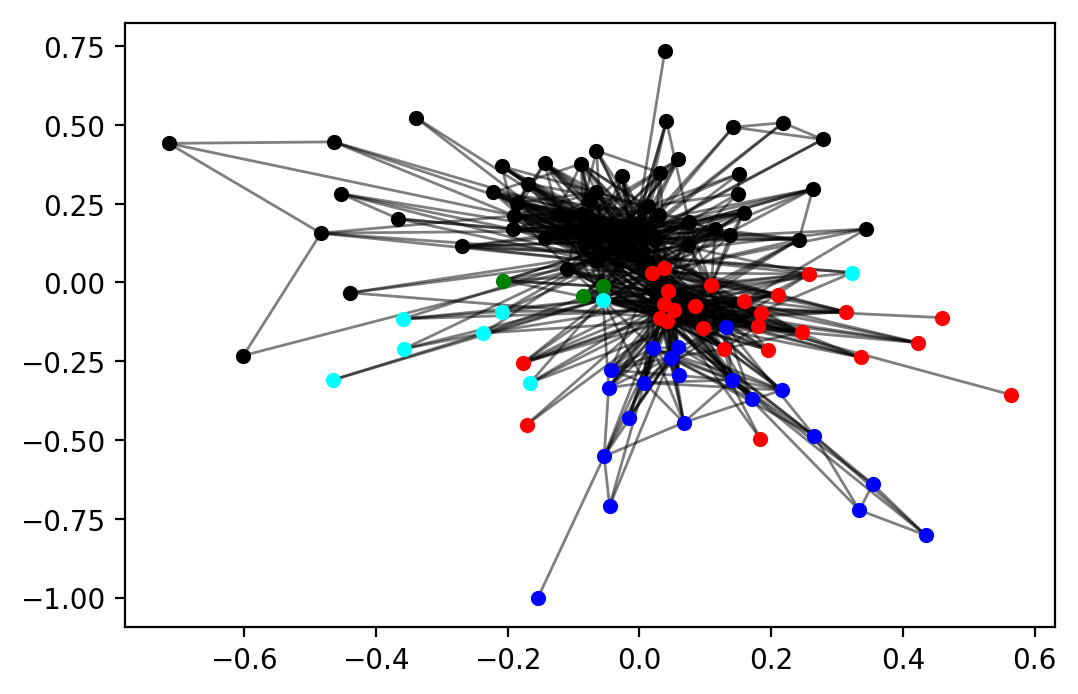

In [71]:
import community as c

#first compute the best partition
partition = c.best_partition(star_wars_graph)

plt.figure(dpi=200)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(star_wars_graph, k=0.9, iterations=200)
count = 0.

color_map = ['black', 'red', 'blue', 'green', 'cyan']
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(star_wars_graph, pos, list_nodes, node_size = 20,
                                node_color = color_map[com])


nx.draw_networkx_edges(star_wars_graph, pos, alpha=0.5);

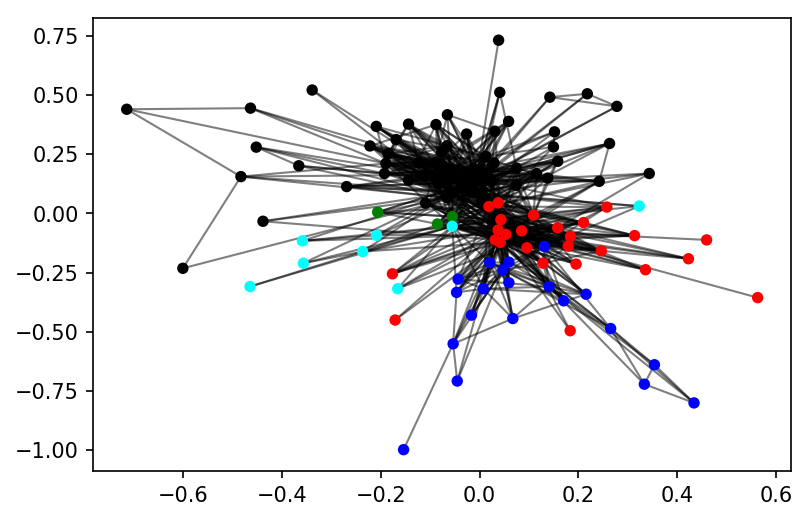

In [83]:
# Can do this quicker as well 
plt.figure(dpi=150)
color_map = ['black', 'red', 'blue', 'green', 'cyan']
partition = c.best_partition(star_wars_graph)
values = [color_map[partition.get(node)] for node in star_wars_graph.nodes()]
nx.draw_networkx_nodes(star_wars_graph, pos, node_size = 20,
                        node_color = values)


nx.draw_networkx_edges(star_wars_graph, pos, alpha=0.5);

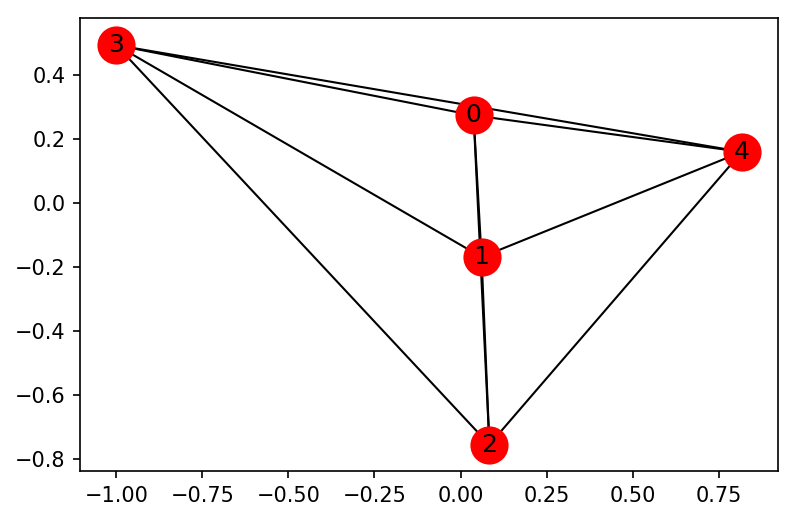

In [63]:
plt.figure(dpi=150)
community_graph = c.induced_graph(partition, star_wars_graph)
pos = nx.spring_layout(community_graph)
nx.draw_networkx_nodes(community_graph, pos)
nx.draw_networkx_edges(community_graph, pos)
nx.draw_networkx_labels(community_graph, pos);

In [53]:
for c_ in community_graph.node:
    print(f"Community {c_}")
    print(', '.join([star_wars_graph.node[key]['name'] for key, value in partition.items() if value == c_]))
    print()

Community 0
NUTE GUNRAY, QUI-GON, TC-14, PK-4, OBI-WAN, YODA, DOFINE, RUNE, TEY HOW, VALORUM, RABE, EMPEROR, CAPTAIN PANAKA, SIO BIBBLE, JAR JAR, TARPALS, BOSS NASS, PADME, RIC OLIE, ANAKIN, WATTO, SEBULBA, JIRA, SHMI, DARTH MAUL, KITSTER, WALD, GREEDO, FODE/BEED, MACE WINDU, KI-ADI-MUNDI, BAIL ORGANA, GENERAL CEEL, BRAVO TWO, BRAVO THREE, COUNT DOOKU, CAPTAIN TYPHO, SENATOR ASK AAK, ORN FREE TAA, RUWEE, JOBAL, SOLA, TAUN WE, LAMA SU, JANGO FETT, POGGLE, SUN RIT, PLO KOON, GENERAL GRIEVOUS, ODD BALL, MON MOTHMA, FANG ZAR, GIDDEAN DANU, CLONE COMMANDER GREE, CLONE COMMANDER CODY, TION MEDON

Community 1
R2-D2, C-3PO, JABBA, BOBA FETT, RED LEADER, CHEWBACCA, CAPTAIN ANTILLES, LUKE, LEIA, YOUNG GIRL, BIGGS, CAMIE, HAN, WEDGE, GOLD LEADER, DODONNA, GOLD FIVE, RIEEKAN, DERLIN, ZEV, DACK, JANSON, LANDO, BIB FORTUNA, BOUSHH, ADMIRAL ACKBAR

Community 2
SNAP, BB-8, POE, LOR SAN TEKKA, KYLO REN, CAPTAIN PHASMA, FINN, REY, UNKAR PLUTT, GENERAL HUX, LIEUTENANT MITAKA, SNOKE, BALA-TIK, MAZ, JESS, 

In [84]:
c.generate_dendrogram(star_wars_graph)

[{0: 0,
  1: 1,
  2: 0,
  3: 0,
  4: 2,
  5: 2,
  6: 0,
  7: 0,
  8: 0,
  9: 1,
  10: 1,
  11: 2,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 2,
  18: 1,
  19: 3,
  20: 2,
  21: 1,
  22: 1,
  23: 1,
  24: 3,
  25: 1,
  26: 0,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 3,
  32: 2,
  33: 2,
  34: 2,
  35: 1,
  36: 1,
  37: 1,
  38: 2,
  39: 2,
  40: 2,
  41: 2,
  42: 2,
  43: 2,
  44: 2,
  45: 2,
  46: 2,
  47: 2,
  48: 3,
  49: 4,
  50: 5,
  51: 5,
  52: 5,
  53: 2,
  54: 2,
  55: 2,
  56: 2,
  57: 3,
  58: 2,
  59: 2,
  60: 2,
  61: 2,
  62: 2,
  63: 2,
  64: 2,
  65: 6,
  66: 3,
  67: 3,
  68: 3,
  69: 3,
  70: 6,
  71: 3,
  72: 3,
  73: 3,
  74: 6,
  75: 3,
  76: 3,
  77: 3,
  78: 3,
  79: 6,
  80: 3,
  81: 3,
  82: 3,
  83: 3,
  84: 6,
  85: 6,
  86: 3,
  87: 3,
  88: 6,
  89: 3,
  90: 6,
  91: 3,
  92: 3,
  93: 3,
  94: 4,
  95: 4,
  96: 4,
  97: 4,
  98: 4,
  99: 4,
  100: 4,
  101: 4,
  102: 4,
  103: 4,
  104: 4,
  105: 4,
  106: 4,
  107: 4,
  108: 4,
  109: 4,
  110: 4,
